## Cтруктура оттока клиентов Интернет магазина

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
file ='Data Sample (AIC) для итоговой работы.xlsx'
xl   = pd.ExcelFile(file)
data = xl.parse('Online Retail')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom


In [3]:
data = data.iloc[:,[4,6,7,0,1,3,5]]
data.head(1)

,InvoiceDate,CustomerID,Country,InvoiceNo,StockCode,Quantity,UnitPrice
0,2010-12-01 08:26:00,17850.0,United Kingdom,536365,84029E,6,3.39


In [4]:
data['InvSum'] = data.Quantity * data.UnitPrice
data.head(1)

,InvoiceDate,CustomerID,Country,InvoiceNo,StockCode,Quantity,UnitPrice,InvSum
0,2010-12-01 08:26:00,17850.0,United Kingdom,536365,84029E,6,3.39,20.34


### InvoiceDate


In [5]:
data.InvoiceDate.describe()

count                   54214
unique                  14058
top       2011-10-31 14:41:00
freq                      127
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [6]:
data['year_month']=data.InvoiceDate.apply(lambda x: str(x)[:7])
data['year'] =pd.to_datetime(data.InvoiceDate).dt.year
data['month']=pd.to_datetime(data.InvoiceDate).dt.month
data['week'] =pd.to_datetime(data.InvoiceDate).dt.week
data.head()

,InvoiceDate,CustomerID,Country,InvoiceNo,StockCode,Quantity,UnitPrice,InvSum,year_month,year,month,week
0,2010-12-01 08:26:00,17850.0,United Kingdom,536365,84029E,6,3.39,20.34,2010-12,2010,12,48
1,2010-12-01 08:34:00,13047.0,United Kingdom,536367,84879,32,1.69,54.08,2010-12,2010,12,48
2,2010-12-01 08:34:00,13047.0,United Kingdom,536367,21755,3,5.95,17.85,2010-12,2010,12,48
3,2010-12-01 08:34:00,13047.0,United Kingdom,536368,22914,3,4.95,14.85,2010-12,2010,12,48
4,2010-12-01 09:02:00,17850.0,United Kingdom,536373,84406B,8,2.75,22.00,2010-12,2010,12,48


In [7]:
data[data.year_month == '2011-12'].week.value_counts()

49    1774
48     759
Name: week, dtype: int64

In [8]:
data = data.iloc[:,[0,8,9,10,11,1,2,3,4,5,6,7]]
data.head(1)

,InvoiceDate,year_month,year,month,week,CustomerID,Country,InvoiceNo,StockCode,Quantity,UnitPrice,InvSum
0,2010-12-01 08:26:00,2010-12,2010,12,48,17850.0,United Kingdom,536365,84029E,6,3.39,20.34


Если анализ помесячно, то последний декабрь брать некорректно / половина месяца

In [9]:
data = data[data.year_month != '2011-12']

### InvoiceNo

In [10]:
data.InvoiceNo.value_counts().shape   # 14877
data.InvoiceNo.value_counts().head()

573585    127
538071     77
579777     70
558475     68
576617     66
Name: InvoiceNo, dtype: int64

По полю пропусков нет, одному заказу может соответствовать несколько позиций в чеке, все параметры Инвойса в целом для строки с одним инвойсом совпадают

### CustomerID

In [11]:
# Количество Покупателей без номера
data[data.CustomerID.isna()].InvoiceNo.unique().shape
# data.CustomerID.value_counts()

(1175,)

In [12]:
# Количество Покупателей с номером / идентифициророванных / зарегистрированных
data.CustomerID.unique().shape

(3777,)

Предположим, что Покупатели по которым не указан номер,  это покупатели не зарегистрированные на сайте, не заполнившие Анкету (о которых мы ничего не знаем). Отследить повторное посещение / покупку  незарегистрированного Покупателя невозможно 

Предположим
Каждый (незарегистрированный  / без номера)  Покупатель в составе датасета  - уникален, то есть оформил 1 Инвойс
Присвоим незарегистрированным покупателям (другие) уникальные номера и закрепим за полем CustomerID признак уникальности покупателя

Дополним Датасет признаком факта регистрации Покупателя на сайте Customer_reg

In [13]:
data.loc[data.CustomerID.isna(),  'Customer_reg'] = 0
data.loc[data.Customer_reg.isna(),'Customer_reg'] = 1

lcd = dict(zip(
                data[data.CustomerID.isna()].InvoiceNo.unique(), 
                list(range(0,1204))
            ))

data.loc[data.CustomerID.isna(),'CustomerID'] = data.loc[data.CustomerID.isna(),'InvoiceNo'].apply(lambda x: lcd[x])
data.CustomerID = data.CustomerID.astype(int)
data.head()

,InvoiceDate,year_month,year,month,week,CustomerID,Country,InvoiceNo,StockCode,Quantity,UnitPrice,InvSum,Customer_reg
0,2010-12-01 08:26:00,2010-12,2010,12,48,17850,United Kingdom,536365,84029E,6,3.39,20.34,1.0
1,2010-12-01 08:34:00,2010-12,2010,12,48,13047,United Kingdom,536367,84879,32,1.69,54.08,1.0
2,2010-12-01 08:34:00,2010-12,2010,12,48,13047,United Kingdom,536367,21755,3,5.95,17.85,1.0
3,2010-12-01 08:34:00,2010-12,2010,12,48,13047,United Kingdom,536368,22914,3,4.95,14.85,1.0
4,2010-12-01 09:02:00,2010-12,2010,12,48,17850,United Kingdom,536373,84406B,8,2.75,22.00,1.0


In [14]:
data.CustomerID.unique().shape

(4951,)

### Country

In [15]:
data.Country.value_counts().head()

United Kingdom    47241
Germany             906
France              853
EIRE                755
Spain               244
Name: Country, dtype: int64

Так как более 90 % продаж сосредоточено в 1 стране, выделить полноценную аналитику по любой из других стран не выйдет (недостаточно данных). Корректным представляется сравнение продаж внутри страны и зарубежом (в целом)

In [16]:
data.loc[data.Country == 'United Kingdom', 'Sales_type']  = 'Domestic_sales'
data.loc[data.Country != 'United Kingdom', 'Sales_type']  = 'Foreign_sales'
data.Sales_type.value_counts()

Domestic_sales    47241
Foreign_sales      4440
Name: Sales_type, dtype: int64

### Quantity

In [17]:
data.Quantity.describe()

count    51681.000000
mean         9.606877
std         58.028561
min      -9600.000000
25%          1.000000
50%          3.000000
75%         10.000000
max       2400.000000
Name: Quantity, dtype: float64

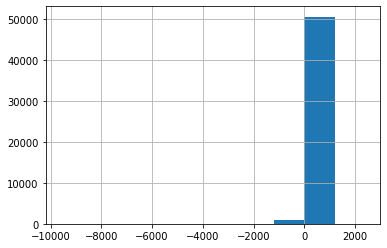

In [18]:
data [data.Quantity == 0].shape  # =0
data [data.Quantity  < 0].shape  # = 1083
data [data.Quantity>2000].shape  # = 2

data.Quantity.hist()

In [19]:
data [data.Quantity  < -500]
# data [data.Quantity  > 1500]
data [data.StockCode == 23005].Quantity.value_counts()

 24      6
 2       6
 1       6
 3       3
 5       2
-9600    1
 48      1
 96      1
-1       1
Name: Quantity, dtype: int64

Нет понимания, что делать с отрицательным количеством товара, которые никак логически не соотносятся ни с  количеством проданных товаров того же артикула по обной сделке, ни с общим количеством по артикулу за истории. Удалим записи с отрицательным количеством товара / до выяснения 


In [20]:
data = data [data.Quantity  > 0]
data.describe()

,year,month,week,CustomerID,Quantity,UnitPrice,InvSum,Customer_reg
count,50639.000000,50639.000000,50639.000000,50639.000000,50639.000000,50639.000000,50639.000000,50639.000000
mean,2010.917929,7.329706,29.815913,11624.274689,10.472600,3.855958,19.876020,0.750291
std,0.274476,3.459262,15.019039,6529.816744,37.736507,18.211851,64.345571,0.432849
min,2010.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,17.000000,12348.500000,1.000000,1.250000,3.900000,1.000000
50%,2011.000000,8.000000,33.000000,14390.000000,3.000000,2.100000,9.920000,1.000000
75%,2011.000000,10.000000,44.000000,16244.000000,11.000000,4.130000,17.700000,1.000000
max,2011.000000,12.000000,51.000000,18287.000000,2400.000000,1687.170000,4121.640000,1.000000


### UnitPrice

In [21]:
data [(data.UnitPrice  == 0)].head()

,InvoiceDate,year_month,year,month,week,CustomerID,Country,InvoiceNo,StockCode,Quantity,UnitPrice,InvSum,Customer_reg,Sales_type
204,2010-12-01 14:35:00,2010-12,2010,12,48,1,United Kingdom,536553,37461,3,0.0,0.0,0.0,Domestic_sales
730,2010-12-03 15:29:00,2010-12,2010,12,48,14,United Kingdom,536995,35951,57,0.0,0.0,0.0,Domestic_sales
1424,2010-12-07 11:48:00,2010-12,2010,12,49,27,United Kingdom,537534,85064,1,0.0,0.0,0.0,Domestic_sales
1425,2010-12-07 11:48:00,2010-12,2010,12,49,27,United Kingdom,537534,22681,2,0.0,0.0,0.0,Domestic_sales
1426,2010-12-07 11:48:00,2010-12,2010,12,49,27,United Kingdom,537534,22520,1,0.0,0.0,0.0,Domestic_sales


похоже на несостоявшиеся сделки или брошенные корзины, доля наблюдений незначительно, исключим записи из датасета

In [22]:
data = data [data.UnitPrice  > 0]

### Традиционные маркетинговые метрики

In [23]:
m_metrics = pd.pivot_table(data,
                               index  = ['year_month'], 
                               values = ['InvoiceNo', 'StockCode', 'Quantity', 'CustomerID', 'InvSum'],
                               aggfunc= {'CustomerID': pd.Series.nunique, 
                                         'InvoiceNo' : pd.Series.nunique, 
                                         'StockCode' : len, 
                                         'Quantity'  : np.mean, 
                                         'InvSum'    : np.sum})
                                         
m_metrics = m_metrics.iloc[:,[0,2,4,3,1]]
m_metrics.columns = ['customers', 'invoices', 'stocks', 'quantity',  'summa']
m_metrics.round(1)

,customers,invoices,stocks,quantity,summa
year_month,,,,,
2010-12,781,1024,4137,8.3,79513.2
2011-01,648,776,3496,9.2,66024.2
2011-02,654,769,2756,11.0,50652.0
2011-03,838,1015,3601,10.6,77141.4
2011-04,744,867,2889,10.0,51989.0
2011-05,916,1128,3587,10.5,77554.7
2011-06,861,1051,3572,11.3,77615.4
2011-07,839,1021,3817,10.7,76444.3
2011-08,770,938,3509,12.8,77937.6


In [24]:
m_metrics['In_to_Cu']  = m_metrics['invoices'] / m_metrics['customers'] # Среднее кол-во заказов на Покупателя 
m_metrics['St_to_In']  = m_metrics['stocks']   / m_metrics['invoices']  # Среднее кол-во товаров в заказе
m_metrics['Avg_price'] = m_metrics['summa']   /  m_metrics['quantity'] / m_metrics['stocks']  # Средняя цена товара
m_metrics['Cast_sum']  = m_metrics['summa']   /  m_metrics['customers'] # Средняя сумма потраченная Покупателем 
m_metrics['Inv_sum']   = m_metrics['summa']   /  m_metrics['invoices']  # Средняя сумма заказа 
m_metrics.round(1)


,customers,invoices,stocks,quantity,summa,In_to_Cu,St_to_In,Avg_price,Cast_sum,Inv_sum
year_month,,,,,,,,,,
2010-12,781,1024,4137,8.3,79513.2,1.3,4.0,2.3,101.8,77.6
2011-01,648,776,3496,9.2,66024.2,1.2,4.5,2.1,101.9,85.1
2011-02,654,769,2756,11.0,50652.0,1.2,3.6,1.7,77.4,65.9
2011-03,838,1015,3601,10.6,77141.4,1.2,3.5,2.0,92.1,76.0
2011-04,744,867,2889,10.0,51989.0,1.2,3.3,1.8,69.9,60.0
2011-05,916,1128,3587,10.5,77554.7,1.2,3.2,2.1,84.7,68.8
2011-06,861,1051,3572,11.3,77615.4,1.2,3.4,1.9,90.1,73.8
2011-07,839,1021,3817,10.7,76444.3,1.2,3.7,1.9,91.1,74.9
2011-08,770,938,3509,12.8,77937.6,1.2,3.7,1.7,101.2,83.1


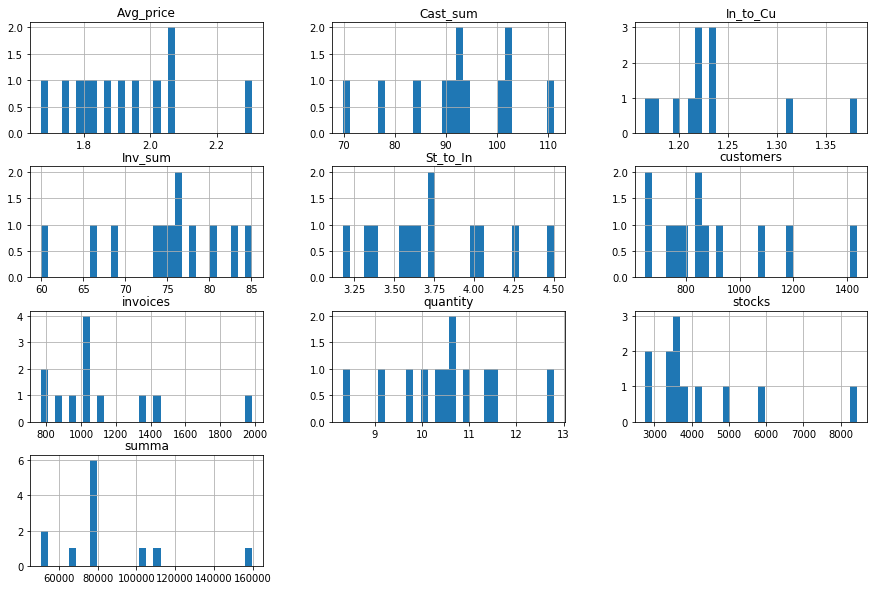

In [25]:
m_metrics.hist(figsize=(15,10), bins=30)
plt.show()

### Классификация продаж по ценовым категориям товаров

In [26]:
group_up   = pd.cut(data['UnitPrice'],[0, 2, 5, 10, 20, 999999]) 
group_su   = pd.cut(data['InvSum'],   [0, 5, 10, 20, 40, 100, 200,999999]) 

PT_UnitPrice_Sum = pd.pivot_table( data, 
                                   values  =['InvSum'], 
                                   index   = group_up, 
                                   columns = group_su,
                                   aggfunc = np.sum,
                                   fill_value = 0) 
PT_UnitPrice_Sum.round(1)

InvSum                                                   \
InvSum         (0, 5]  (5, 10]  (10, 20] (20, 40] (40, 100] (100, 200]   
UnitPrice                                                                
(0, 2]        21763.6  28269.5  100223.4  49976.1   44014.3    51310.4   
(2, 5]        23068.1  23085.2   78328.2  69900.7   56965.2    35041.5   
(5, 10]           0.0  18063.6   35293.5  21383.1   31107.3    13128.1   
(10, 20]          0.0      0.0   15548.8  12797.0   11410.1     9465.4   
(20, 999999]      0.0      0.0       0.0   4843.4    5022.4     8075.9   

                            
InvSum       (200, 999999]  
UnitPrice                   
(0, 2]             67339.9  
(2, 5]            103888.0  
(5, 10]            25966.5  
(10, 20]           14128.7  
(20, 999999]       27094.0

In [27]:
data.loc[data.UnitPrice  < 1.5,                        'UnitPrice_Group'] = '1_minimum_price'
data.loc[(data.UnitPrice >=1.5) &(data.UnitPrice < 2.5),'UnitPrice_Group'] = '2_low_price'
data.loc[(data.UnitPrice >=2.5) & (data.UnitPrice < 5), 'UnitPrice_Group'] = '3_middle_price'
data.loc[(data.UnitPrice >= 5) & (data.UnitPrice <10), 'UnitPrice_Group'] = '4_high_price'
data.loc[(data.UnitPrice >=10),                        'UnitPrice_Group'] = '5_maximum_price'

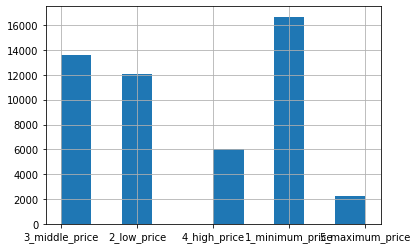

In [28]:
data.UnitPrice_Group.hist()

In [29]:
PT_UnitPrice_Sum = pd.pivot_table( data, 
                                   values  = ['InvSum'], 
                                   index   = ['UnitPrice_Group'], 
                                   columns = ['year', 'month'],
                                   aggfunc = np.sum,
                                   fill_value = 0,
                                   margins=True) 
PT_UnitPrice_Sum_percentage = np.round(PT_UnitPrice_Sum*100/PT_UnitPrice_Sum.iloc[-1, -1], 1)
PT_UnitPrice_Sum_percentage

InvSum                                                      \
year              2010 2011                                                  
month               12    1    2    3    4    5    6    7    8     9    10   
UnitPrice_Group                                                              
1_minimum_price    1.5  1.3  1.2  1.6  1.1  1.5  1.7  1.8  2.1   2.5   2.6   
2_low_price        1.2  1.2  1.0  1.7  1.1  1.8  1.6  1.5  1.9   2.3   2.7   
3_middle_price     2.6  2.4  1.5  2.1  1.6  2.4  2.6  2.1  2.4   2.9   3.2   
4_high_price       1.4  1.1  0.8  1.0  0.7  1.2  0.9  1.3  0.8   1.7   1.6   
5_maximum_price    1.2  0.6  0.5  1.2  0.6  0.8  0.9  0.8  0.6   0.7   0.9   
All                7.9  6.6  5.0  7.7  5.2  7.7  7.7  7.6  7.7  10.1  11.0   

                              
year                     All  
month              11         
UnitPrice_Group               
1_minimum_price   3.4   22.4  
2_low_price       3.6   21.5  
3_middle_price    5.2   31.0  
4_high_price      1.9   14.4  
5_maximum_price   1.8   10.8  
All              15.9  100.0

###  История активности Покупателей



In [30]:
data['LTV']    = np.nan         # Сумма покупок за срок жизни клиента / здесь и далее по разделу - до даты наблюдения
data['LTCS']   = np.nan         # Количество покупок за срок жизни клиента - LifeTimeCountofSales
data['LTP']    = np.nan         # Количество месяцев жизни клиента - LifeTimePeriod
data['LTAOV']  = np.nan         # Средняя сумма покупки за срок  жизни клиента - LifeTimeAverageOrderValue
data['LTAUP']  = np.nan         # Средняя цена 1 товара за срок  жизни клиента - LifeTimeAverageUnitPrice
                                # медиана цен всех товаров, встретившихся в чеках (с учeтом 
                                # частоты встречаемости позиции в чеке, без учета доли в стоимости покупок)

In [31]:
data = data.sort_values('InvoiceDate', ascending=[True])
data = data.reset_index().drop(['index'], axis = 1)

Расчет и классификация показателя LTV / Сумма всех покупок за срок жизни Покупателя

In [33]:
for i in range(0,len(data)):
    data.iloc[i,15] = data.loc[ (data['CustomerID'] == data['CustomerID'][i])&    # LTV
                                (data['year_month'] <= data['year_month'][i]), 
                                'InvSum'].sum()                              
    
data.loc[(data.LTV > 0)   & (data.LTV <= 100),'LTVg'] = '0-100$'
data.loc[(data.LTV > 100) & (data.LTV <= 500),'LTVg'] = '100-500$'
data.loc[data.LTV >  500                     ,'LTVg'] = '>500$'
data.head()

,InvoiceDate,year_month,year,month,week,CustomerID,Country,InvoiceNo,StockCode,Quantity,...,InvSum,Customer_reg,Sales_type,UnitPrice_Group,LTV,LTCS,LTP,LTAOV,LTAUP,LTVg
0,2010-12-01 08:26:00,2010-12,2010,12,48,17850,United Kingdom,536365,84029E,6,...,20.34,1.0,Domestic_sales,3_middle_price,467.92,NaN,NaN,NaN,NaN,100-500$
1,2010-12-01 08:34:00,2010-12,2010,12,48,13047,United Kingdom,536367,84879,32,...,54.08,1.0,Domestic_sales,2_low_price,86.78,NaN,NaN,NaN,NaN,0-100$
2,2010-12-01 08:34:00,2010-12,2010,12,48,13047,United Kingdom,536367,21755,3,...,17.85,1.0,Domestic_sales,4_high_price,86.78,NaN,NaN,NaN,NaN,0-100$
3,2010-12-01 08:34:00,2010-12,2010,12,48,13047,United Kingdom,536368,22914,3,...,14.85,1.0,Domestic_sales,3_middle_price,86.78,NaN,NaN,NaN,NaN,0-100$
4,2010-12-01 09:02:00,2010-12,2010,12,48,17850,United Kingdom,536373,84406B,8,...,22.00,1.0,Domestic_sales,3_middle_price,467.92,NaN,NaN,NaN,NaN,100-500$


Расчет и классификация показателя LTCS / Количество покупок за срок жизни Покупателя

In [34]:
for i in range(0,len(data)):                            
    
    data.iloc[i,16] = data.loc[ (data['CustomerID'] == data['CustomerID'][i])&    # LTCS  
                                (data['year_month'] <= data['year_month'][i]), 
                                'InvoiceNo'].unique().shape[0]

Классификация показателя LTP / Срок жизни (активности) Покупателя в месяцах

In [35]:
for i in range(0,len(data)):
    data.iloc[i,17] = data.loc[ (data['CustomerID'] == data['CustomerID'][i])&    # LTP
                                (data['year_month'] <= data['year_month'][i]), 
                                'year_month'].unique().shape[0]

data.loc[ data.LTP == 0,    'LTPg'] = '0'
data.loc[(data.LTP == 1),   'LTPg'] = '1_m'
data.loc[(data.LTP <  4)&
         (data.LTP >  1),   'LTPg'] = '2-3_m'
data.loc[(data.LTP >  3),   'LTPg'] = '4+_m'
data['LTPg'].value_counts()

1_m      25271
4+_m     13016
2-3_m    12251
Name: LTPg, dtype: int64

Расчет / классификация показателя LTAOV / Средняя сумма покупки за срок жизни Покупателя

In [36]:
data.loc[data['LTCS']  != 0, 'LTAOV'] = data['LTV']/data['LTCS']

data.loc[(data['LTCS'] != 0)&(data['LTAOV'] <20),                    'LTAOVg'] = '0-20$'
data.loc[(data['LTCS'] != 0)&(data['LTAOV'] >50),                    'LTAOVg'] = '50+ $'
data.loc[(data['LTCS'] != 0)&(data['LTAOV'] >20)&(data['LTAOV']<50), 'LTAOVg'] = '20-50$'
        
data['LTAOVg'].fillna('0$', inplace = True) 

PT_ASB = pd.pivot_table(data, 
                        values  = ['InvSum'], 
                        index   = ['LTAOVg'], 
                        columns = ['year', 'month'],
                        aggfunc = np.sum,
                        fill_value = 0,
                        margins=True) 
PT_ASB_percentage = np.round(PT_ASB*100/PT_ASB.iloc[-1, -1], 1)
PT_ASB_percentage

InvSum                                                                 
year     2010 2011                                                         All
month      12    1    2    3    4    5    6    7    8     9    10    11       
LTAOVg                                                                        
0$        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0    0.0
0-20$     0.3  0.2  0.2  0.2  0.2  0.3  0.3  0.2  0.2   0.3   0.3   0.4    3.2
20-50$    1.2  0.9  1.0  1.3  1.1  1.6  1.4  1.4  1.3   2.0   2.2   3.1   18.5
50+ $     6.4  5.5  3.8  6.1  3.8  5.9  6.1  6.0  6.3   7.8   8.5  12.3   78.3
All       7.9  6.6  5.0  7.7  5.2  7.7  7.7  7.6  7.7  10.1  11.0  15.9  100.0

Расчет / классификация показателя LTAUP / Средняя (наиболее характерная) цена товара за срок жизни Покупателя

In [37]:
for i in range(0,len(data)):
    data.iloc[i,19] = data.loc[ (data['CustomerID'] == data['CustomerID'][i])&    # LTP
                                (data['year_month'] <= data['year_month'][i]), 
                                'UnitPrice'].median()


In [38]:
data.fillna(0, inplace = True) 

In [39]:
def classify_unit_price (x):   
    z='0'
    if x > 0:
        z = '< 1$'
        if x > 1:
            z = '1-2$'
            if x > 2:
                z = '>2$'
    return z

data['LTAUPg'] = data['LTAUP'].astype(int).apply(classify_unit_price) 
data['LTAUPg'].value_counts()

< 1$    19744
1-2$    16375
>2$     12210
0        2209
Name: LTAUPg, dtype: int64

### Показатели покупок в  текущем месяце / месяце покупки

####  Сумма покупок за последний / текущий месяц

In [40]:
data['LMTV'] = np.nan       # Last month time value - сумма покупок за последний месяц наблюдений
data['LMTVg'] = np.nan      # LMTV сгруппированные значения

In [41]:
def classify_sum (x):
    z = 'no_sales'
    if x.InvSum.sum() > 0:
        z = '<50$'
        if x.InvSum.sum() > 50:
            z = '50-150$'
            if x.InvSum.sum() > 150:
                z = '>150$'
    return z
    
classify_rate_1 = data.groupby(['CustomerID', 'year_month']).apply(classify_sum)
classify_rate_2 = data.groupby(['CustomerID', 'year_month']).InvSum.sum()

In [42]:
data['LMTV'] = np.nan
data['LMTVg'] = np.nan

for i in range(len(data)):
    data.iloc[i,25]  = classify_rate_1[data.iloc[i,5], data.iloc[i,1]]
    data.iloc[i,24]  = classify_rate_2[data.iloc[i,5], data.iloc[i,1]].round(1)
    
data['LMTVg'].value_counts()

50-150$    19069
>150$      16338
<50$       15131
Name: LMTVg, dtype: int64

### Дополнительные / служебные поля

####  Первая покупка на сайте (да/нет)

In [43]:
data['First_sale'] = np.nan

for i in range(len(data)):
    if data.iloc[i,17]  == 1:
        if data.loc[(data['CustomerID'] == data['CustomerID'][i])& 
                    (data['year_month'] == data['year_month'][i]),
                    'InvSum'].sum() > 0:
            data.iloc[i,26] = 1
    else:
        data.iloc[i,26] = 0
    
data['First_sale'].value_counts()

1.0    25271
0.0    25267
Name: First_sale, dtype: int64

### Показатели ушедших покупателей

По состоянию на каждую дату, определим состав покупателей, которые прекратили совершать покупки по следующему алгоритму:
- определим в каких месяцах / периодах каждый из покупателей совершал покупки (сумма покупок >0) / Customer_sales_month;
- для каждого покупателя на каждый месяц определим значения:
а) если покупки были - присвоим '0' - клиент за месяц был активен / не уходил;
б) если покупок за месяц не было - присвоим значение количества месяцев,  прошедших с последней покупки до месяца наблюдения; / Customer_rate_month
- из полученных данных сформируем df в формате :  CustomerID/Месяц наблюдения/Месяц последней покупки/срок ... Покупателей прекративших активность более 3 месяцев назад исключаем из выборки, как (условно) не подлежащих возврату / Customers_away
- merge Customers_away и LifeTime показателями основного датасета и получаем базу для аналитики состава Покупателей, утративших лояльность, которая ляжет в основу Дашборда 

In [44]:
Customer_sales_month = pd.pivot_table(data,
                       columns  = ['year_month'], 
                       index    = ['CustomerID'],
                       values   = ['InvSum'],
                       aggfunc  = 'sum',
                       fill_value = 0)

Customer_sales_month.tail()

InvSum                                                          \
year_month 2010-12 2011-01 2011-02 2011-03 2011-04 2011-05 2011-06 2011-07   
CustomerID                                                                   
18278          0.0     0.0    0.00     0.0    0.00    0.00    0.00    0.00   
18281          0.0     0.0    0.00     0.0    0.00    0.00   16.50    0.00   
18282          0.0     0.0    0.00     0.0    0.00    0.00    0.00    0.00   
18283          0.0    23.6    3.35     0.0    9.61   12.18   33.37   18.33   
18287          0.0     0.0    0.00     0.0    0.00  115.20    0.00    0.00   

                                            
year_month 2011-08 2011-09 2011-10 2011-11  
CustomerID                                  
18278         0.00   49.50    0.00    0.00  
18281         0.00    0.00    0.00    0.00  
18282        22.95    0.00    0.00    0.00  
18283         0.00    7.15   16.87   83.82  
18287         0.00    0.00   43.68    0.00

In [45]:
Customer_rate_month = pd.DataFrame(data = np.zeros((len(Customer_sales_month),len(Customer_sales_month.columns))))

periods  = ['2010-12', '2011-01','2011-02', '2011-03', '2011-04', '2011-05', 
            '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11']

Customer_rate_month.columns  = periods

z = 0
for i in range(0,len(Customer_sales_month.columns)): 
    for j in range (0,len(Customer_sales_month)): 
        if Customer_sales_month.iloc[j,i] > 0 or i ==0:
            z = 0            
        elif Customer_sales_month.iloc[j,i] ==0 and i >0:
            z = 1
            if Customer_sales_month.iloc[j,i-1] ==0 and i >1:
                z = 2
                if Customer_sales_month.iloc[j,i-2] ==0 and i >2:
                    z = 3
                    if Customer_sales_month.iloc[j,i-3] ==0 and i >3:
                        z = 4                                
        Customer_rate_month.iloc[j,i] = z     
        
Customer_rate_month.index = Customer_sales_month.index
Customer_rate_month.tail()

,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
CustomerID,,,,,,,,,,,,
18278,0.0,1.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,0.0,1.0,2.0
18281,0.0,1.0,2.0,3.0,4.0,4.0,0.0,1.0,2.0,3.0,4.0,4.0
18282,0.0,1.0,2.0,3.0,4.0,4.0,4.0,4.0,0.0,1.0,2.0,3.0
18283,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18287,0.0,1.0,2.0,3.0,4.0,0.0,1.0,2.0,3.0,4.0,0.0,1.0


In [46]:
Customers_away         = Customer_rate_month.iloc[:,[0]].reset_index().astype(int)
Customers_away.columns = ['CustomerID', 'months_away']
Customers_away['year_month']= '2010-12'
Customers_away['new_col']= 0

for i in range (1,12):
    z = Customer_rate_month.iloc[:,[i]].reset_index()
    z.columns = ['CustomerID', 'months_away']  
    z['year_month']= Customer_rate_month.columns[i]
    z['new_col']= i - z['months_away']
    Customers_away = pd.concat([Customers_away, z]) 

Customers_away.months_away = Customers_away.months_away.astype(int).round(0)
Customers_away.months_away.value_counts()

4    18597
0    14682
1     9988
2     7422
3     5759
Name: months_away, dtype: int64

In [47]:
Customers_away = Customers_away.reset_index().drop(['index'], axis = 1)
Customers_away = Customers_away.sort_values(['CustomerID', 'year_month'], ascending= True)
Customers_away['new_col'] = Customers_away['new_col'].astype(int)
Customers_away.tail(6)

,CustomerID,months_away,year_month,new_col
32927,18287,1,2011-06,5
37631,18287,2,2011-07,5
42335,18287,3,2011-08,5
47039,18287,4,2011-09,5
51743,18287,0,2011-10,10
56447,18287,1,2011-11,10


In [48]:
def classify_p (x):
    return periods[x]
Customers_away['New_year_month']= Customers_away.new_col.apply(classify_p)
Customers_away.tail()

,CustomerID,months_away,year_month,new_col,New_year_month
37631,18287,2,2011-07,5,2011-05
42335,18287,3,2011-08,5,2011-05
47039,18287,4,2011-09,5,2011-05
51743,18287,0,2011-10,10,2011-10
56447,18287,1,2011-11,10,2011-10


In [49]:
data_away = data.iloc[:,[1,5,12,13,16,17,18,19,20,21,22,23,24,25,26]].fillna(0)
data_away.head(1)

,year_month,CustomerID,Customer_reg,Sales_type,LTCS,LTP,LTAOV,LTAUP,LTVg,LTPg,LTAOVg,LTAUPg,LMTV,LMTVg,First_sale
0,2010-12,17850,1.0,Domestic_sales,17.0,1.0,27.524706,3.07,100-500$,1_m,20-50$,>2$,467.9,>150$,1.0


In [50]:
Customers_away_info = Customers_away.merge(  data_away, 
                                             how = 'left', 
                                             left_on =['CustomerID','New_year_month'], 
                                             right_on=['CustomerID','year_month'])

Customers_away_info = Customers_away_info.drop_duplicates()
Customers_away_info.tail()

,CustomerID,months_away,year_month_x,new_col,New_year_month,year_month_y,Customer_reg,Sales_type,LTCS,LTP,LTAOV,LTAUP,LTVg,LTPg,LTAOVg,LTAUPg,LMTV,LMTVg,First_sale
156975,18287,2,2011-07,5,2011-05,2011-05,1.0,Domestic_sales,1.0,1.0,115.20,2.55,100-500$,1_m,50+ $,1-2$,115.2,50-150$,1.0
156979,18287,3,2011-08,5,2011-05,2011-05,1.0,Domestic_sales,1.0,1.0,115.20,2.55,100-500$,1_m,50+ $,1-2$,115.2,50-150$,1.0
156983,18287,4,2011-09,5,2011-05,2011-05,1.0,Domestic_sales,1.0,1.0,115.20,2.55,100-500$,1_m,50+ $,1-2$,115.2,50-150$,1.0
156987,18287,0,2011-10,10,2011-10,2011-10,1.0,Domestic_sales,2.0,2.0,79.44,2.00,100-500$,2-3_m,50+ $,1-2$,43.7,<50$,0.0
156989,18287,1,2011-11,10,2011-10,2011-10,1.0,Domestic_sales,2.0,2.0,79.44,2.00,100-500$,2-3_m,50+ $,1-2$,43.7,<50$,0.0


In [51]:
Customers_away_info = Customers_away_info.iloc[:,[0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,17,18]]

In [52]:
Customers_away_info.rename(columns={'year_month_x': 'month_look', 'New_year_month': 'month_l_sale'}, inplace=True)

In [61]:
Customers_away_info_filtered = Customers_away_info [(Customers_away_info.months_away  >  0)&
                                                    (Customers_away_info.months_away  <  4)&
                                                    (Customers_away_info.Customer_reg >= 0)&
                                                    (Customers_away_info.LMTV         > 0)
                                                    
                                                 ]
Customers_away_info_filtered.head()

,CustomerID,months_away,month_look,month_l_sale,Customer_reg,Sales_type,LTCS,LTP,LTAOV,LTAUP,LTVg,LTPg,LTAOVg,LTAUPg,LMTV,LMTVg,First_sale
44,0,1,2011-01,2010-12,0.0,Domestic_sales,1.0,1.0,311.89,3.36,100-500$,1_m,50+ $,>2$,311.9,>150$,1.0
88,0,2,2011-02,2010-12,0.0,Domestic_sales,1.0,1.0,311.89,3.36,100-500$,1_m,50+ $,>2$,311.9,>150$,1.0
132,0,3,2011-03,2010-12,0.0,Domestic_sales,1.0,1.0,311.89,3.36,100-500$,1_m,50+ $,>2$,311.9,>150$,1.0
278,2,1,2011-01,2010-12,0.0,Domestic_sales,1.0,1.0,440.34,4.21,100-500$,1_m,50+ $,>2$,440.3,>150$,1.0
329,2,2,2011-02,2010-12,0.0,Domestic_sales,1.0,1.0,440.34,4.21,100-500$,1_m,50+ $,>2$,440.3,>150$,1.0


In [54]:
Customers_away_info_filtered_1 = Customers_away_info_filtered [Customers_away_info.months_away  ==1]
Customers_away_info_filtered_1.shape

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(6498, 17)

In [91]:
full_metrics = m_metrics.iloc[:,[0,4]]

away_metrics = Customers_away_info_filtered[
               Customers_away_info_filtered.months_away==1].iloc[:,[0,1,2,14]
              ].groupby(['month_look'])['months_away','LMTV'].sum()

basic_table  =  full_metrics.merge(away_metrics,
                                   how = 'left', 
                                   left_on =['year_month'], 
                                   right_on=away_metrics.index)
basic_table.columns = ['Period', 'Customers', 'Sales_gross', 'Customers_away', 'Sales_customers_away']
basic_table['Customers_away_%'] = 100*basic_table['Customers_away'] / basic_table['Customers']
basic_table['Sales_away_%']     = 100*basic_table['Sales_customers_away'] / basic_table['Sales_gross']
bt1 = basic_table.set_index('Period').iloc[1:].round(1)
bt2 = bt1.iloc[:,2:]
bt2

,Customers_away,Sales_customers_away,Customers_away_%,Sales_away_%
Period,,,,
2011-01,567.0,53676.8,87.5,81.3
2011-02,477.0,41840.7,72.9,82.6
2011-03,476.0,31518.7,56.8,40.9
2011-04,650.0,54564.2,87.4,105.0
2011-05,499.0,34144.3,54.5,44.0
2011-06,645.0,47665.6,74.9,61.4
2011-07,629.0,38219.5,75.0,50.0
2011-08,590.0,42277.8,76.6,54.2
2011-09,483.0,42899.0,44.1,42.2


In [92]:
writer = pd.ExcelWriter('DS LC.xlsx', engine='xlsxwriter')
   
data.to_excel(                          writer, 'dataset')
m_metrics.to_excel(                     writer, 'm_metrics')
Customers_away_info_filtered.to_excel(  writer, 'Lost_customers')
Customers_away_info_filtered_1.to_excel(writer, 'Lost_customers_filt')
bt1.to_excel(                           writer, 'bt1')
bt2.to_excel(                           writer, 'bt2')
writer.save()